In [1]:
'''
Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.
'''

"\nObjective:\nThe objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. \nExploratory Data Analysis (EDA):\n1.\tLoad the Titanic dataset using Python's pandas library.\n2.\tCheck for missing values.\n3.\tExplore data distributions using histograms and box plots.\n4.\tVisualize relationships between features and survival using scatter plots and bar plots.\nData Preprocessing:\n1.\tImpute missing values.\n2.\tEncode categorical variables using one-hot encoding or label encoding. \n3.\tIf needed you can apply more preprocessing methods on the given dataset.\nBuilding Predictive Models:\n1.\tSplit the preprocessed dataset into training and testing sets.\n2.\tChoose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.\n3.\tBuild predictive models using LightGBM and XGBoost algorithms.\n4.\tTrain the models on the training set and evaluate their performance on the testing set.\

In [2]:
'''
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
'''

"\nExploratory Data Analysis (EDA):\n1.\tLoad the Titanic dataset using Python's pandas library.\n2.\tCheck for missing values.\n3.\tExplore data distributions using histograms and box plots.\n4.\tVisualize relationships between features and survival using scatter plots and bar plots.\n"

In [3]:
#Load the Titanic dataset using Python's pandas library.
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\XGBM & LGBM\\XGBM & LGBM\\Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Check for missing values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

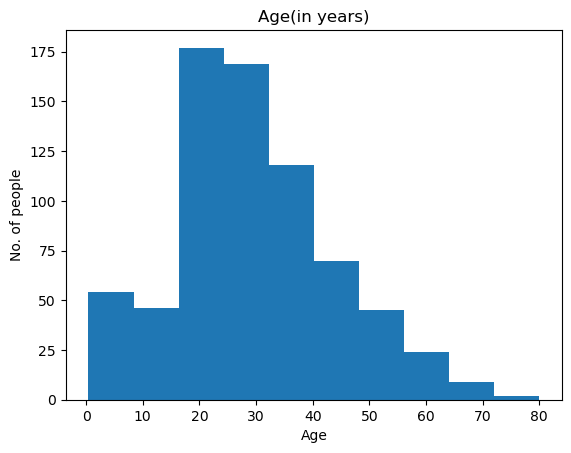

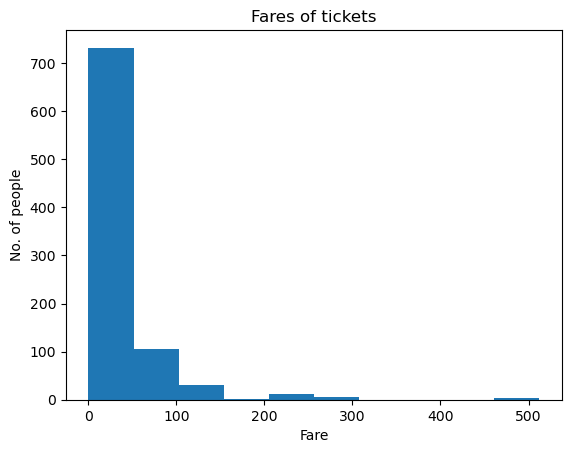

In [7]:
#Explore data distributions using histograms and box plots.
import matplotlib.pyplot as plt
plt.hist(df["Age"])
plt.title("Age(in years)")
plt.xlabel("Age")
plt.ylabel("No. of people")
plt.show()

plt.hist(df["Fare"])
plt.title("Fares of tickets")
plt.xlabel("Fare")
plt.ylabel("No. of people")
plt.show()

<Axes: >

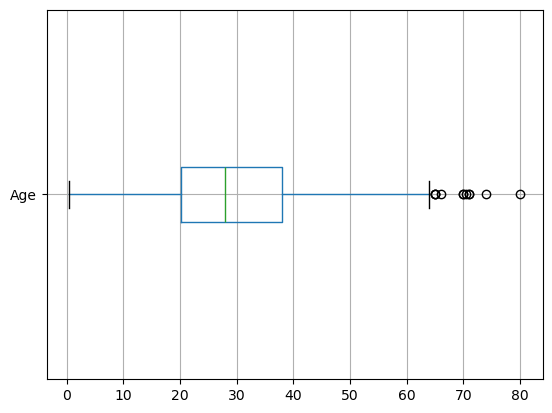

In [8]:
#boxplot
df.boxplot(column="Age",vert=False)

<Axes: >

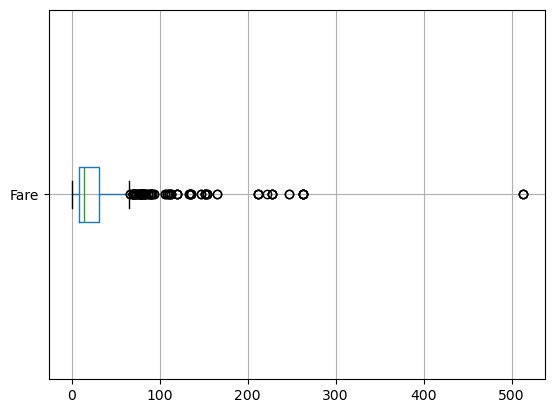

In [9]:
df.boxplot(column="Fare",vert=False)

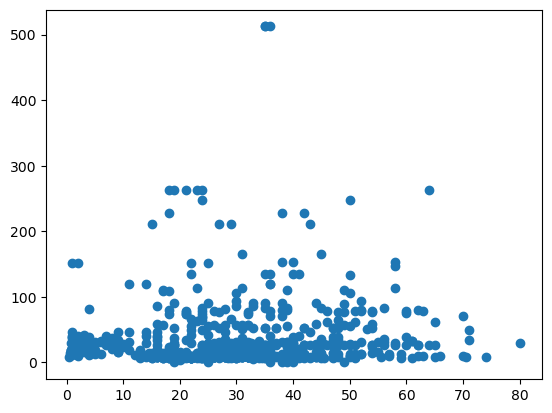

In [10]:
#Visualize relationships between features and survival using scatter plots and bar plots.
plt.scatter(df["Age"],df["Fare"])
plt.show()

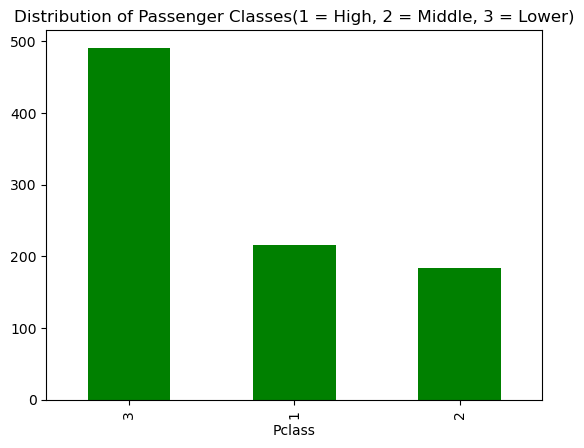

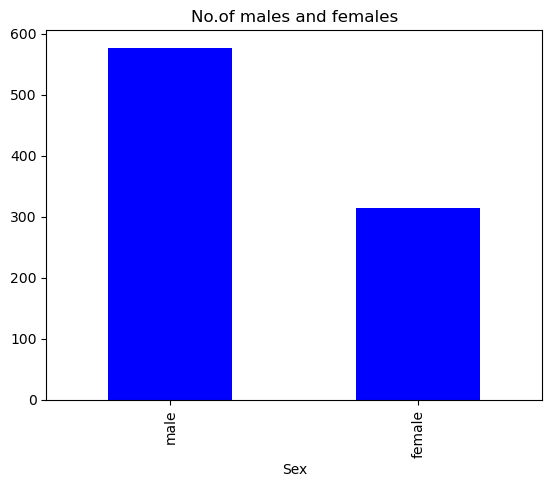

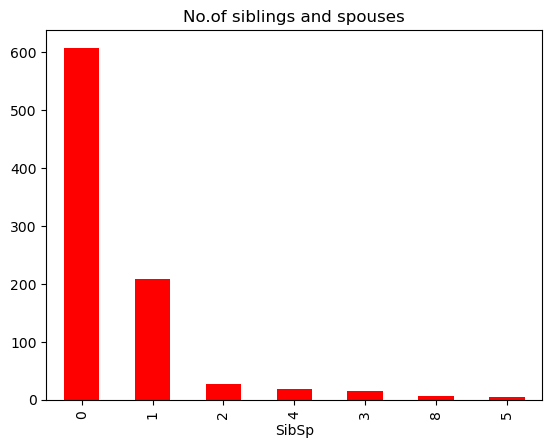

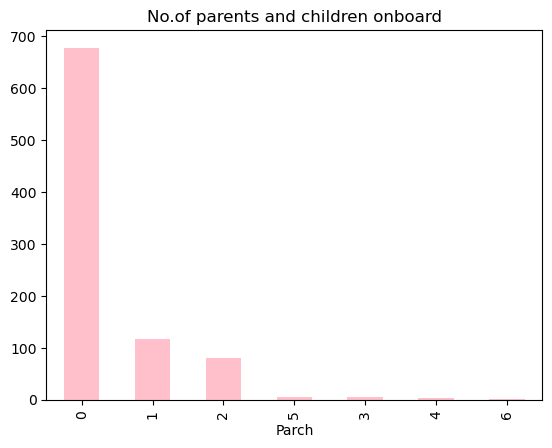

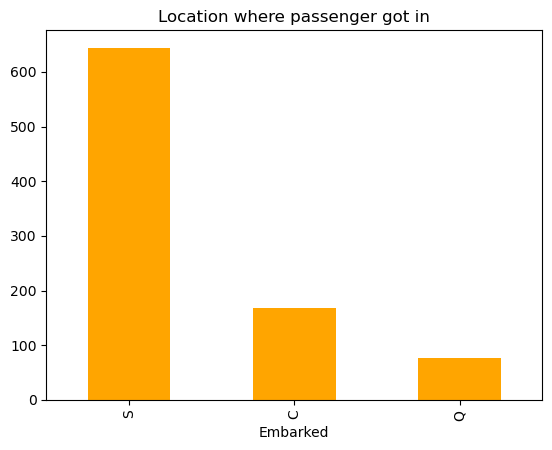

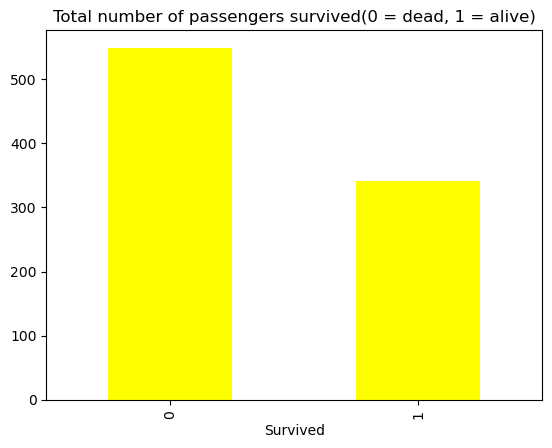

In [11]:
df["Pclass"].value_counts().plot(kind="bar",color="green")
plt.title("Distribution of Passenger Classes(1 = High, 2 = Middle, 3 = Lower)")
plt.show()

df["Sex"].value_counts().plot(kind="bar",color="blue")
plt.title("No.of males and females")
plt.show()

df["SibSp"].value_counts().plot(kind="bar",color="red")
plt.title("No.of siblings and spouses")
plt.show()

df["Parch"].value_counts().plot(kind="bar",color="pink")
plt.title("No.of parents and children onboard")
plt.show()

df["Embarked"].value_counts().plot(kind="bar",color="orange")
plt.title("Location where passenger got in")
plt.show()

df["Survived"].value_counts().plot(kind="bar",color="yellow")
plt.title("Total number of passengers survived(0 = dead, 1 = alive)")
plt.show()

In [12]:
df_num = df[["Survived","Pclass","SibSp","Parch","Fare","Age"]]
correlation_matrix = df_num.corr()
correlation_matrix

,Survived,Pclass,SibSp,Parch,Fare,Age
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.077221
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.369226
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.308247
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.189119
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.096067
Age,-0.077221,-0.369226,-0.308247,-0.189119,0.096067,1.000000


<Axes: >

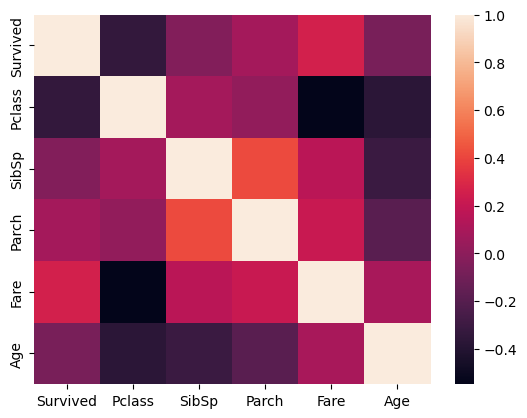

In [13]:
import seaborn as sns
sns.heatmap(correlation_matrix)

In [14]:
'''
Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
'''

'\nData Preprocessing:\n1.\tImpute missing values.\n2.\tEncode categorical variables using one-hot encoding or label encoding. \n3.\tIf needed you can apply more preprocessing methods on the given dataset.\n'

In [15]:
#Impute missing values.
df.drop(columns = "Cabin",inplace=True)#dropping cabin as it has too many null values
avg_age = int(df["Age"].mean())
df["Age"].fillna(avg_age,inplace=True)#impute with mean
df["Embarked"].fillna(method="ffill",inplace=True)
df.tail()

C:\Users\sujey\AppData\Local\Temp\ipykernel_23260\2390510866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(avg_age,inplace=True)#impute with mean
C:\Users\sujey\AppData\Local\Temp\ipykernel_23260\2390510866.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Sex"] = LE.fit_transform(df["Sex"])
df["Embarked"] = LE.fit_transform(df["Embarked"])
df["Name"] = LE.fit_transform(df["Name"])
df["Ticket"] = LE.fit_transform(df["Ticket"])
df_label = df[["Sex","Embarked","Name","Ticket"]]
df_label.head()

,Sex,Embarked,Name,Ticket
0,1,2,108,523
1,0,0,190,596
2,0,2,353,669
3,0,2,272,49
4,1,2,15,472


In [18]:
X = df[["Age","Fare"]]

In [19]:
#Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,Age,Fare
0,-0.581659,-0.502445
1,0.649327,0.786845
2,-0.273913,-0.488854
3,0.418517,0.420730
4,0.418517,-0.486337


In [20]:
df_new = pd.concat([SS_X,df_label,df[["Parch","SibSp","Pclass","Survived"]]],axis=1)
df_new

,Age,Fare,Sex,Embarked,Name,Ticket,Parch,SibSp,Pclass,Survived
0,-0.581659,-0.502445,1,2,108,523,0,1,3,0
1,0.649327,0.786845,0,0,190,596,0,1,1,1
2,-0.273913,-0.488854,0,2,353,669,0,0,3,1
3,0.418517,0.420730,0,2,272,49,0,1,1,1
4,0.418517,-0.486337,1,2,15,472,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.196976,-0.386671,1,2,548,101,0,0,2,0
887,-0.812469,-0.044381,0,2,303,14,0,0,1,1
888,-0.043103,-0.176263,0,2,413,675,2,1,3,0
889,-0.273913,-0.044381,1,0,81,8,0,0,1,1


In [21]:
'''
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
'''

'\nBuilding Predictive Models:\n1.\tSplit the preprocessed dataset into training and testing sets.\n2.\tChoose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.\n3.\tBuild predictive models using LightGBM and XGBoost algorithms.\n4.\tTrain the models on the training set and evaluate their performance on the testing set.\n5.\tUse techniques like cross-validation and hyperparameter tuning to optimize model performance.\n'

In [22]:
#Split the variables
X = df_new.drop("Survived",axis=1)
Y = df["Survived"]

In [23]:
#Split into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 100,test_size = 0.2,stratify=Y)

In [24]:
#train the model using LightGBM
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100,random_state=42,learning_rate=0.1)
gb_model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

In [25]:
Y_pred_test = gb_model.predict(X_test)

In [31]:
#calculate metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
test_score = accuracy_score(Y_test,Y_pred_test)
prec_score = precision_score(Y_test,Y_pred_test)
recall = recall_score(Y_test,Y_pred_test)
f1 = f1_score(Y_test,Y_pred_test)
print("Testing accuracy:",round(test_score,2))
print("Precision score:",round(prec_score,2))
print("Recall score:",round(recall,2))
print("F1 score:",round(f1,2))

Testing accuracy: 0.88
Precision score: 0.84
Recall score: 0.84
F1 score: 0.84


In [32]:
#pip install xgboost

In [45]:
#Using XGBoost 
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.1,gamma=100,reg_lambda=10,n_estimators=100)
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=100, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
Y_pred_test_xgb = xgb_model.predict(X_test)

In [47]:
#calculate metrics
from sklearn.metrics import accuracy_score
test_score = accuracy_score(Y_test,Y_pred_test_xgb)
print("Testing accuracy:",round(test_score,2))

Testing accuracy: 0.61


In [35]:
#Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
#Using grid search CV for gradient boosting
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150 ,200,250,300],
    'learning_rate': [0.01,0.1, 0.5, 1, 1.5,2]
}

# Create the bagging classifier with a decision tree estimator
gb_model = GradientBoostingClassifier(random_state=42,max_features=0.7)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best score: 0.8272300469483568
Test accuracy: 0.8547486033519553


In [48]:
#Grid Search CV for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 1, 0.01],
    'gamma': [10, 20, 50],
    'reg_lambda': [1, 5, 10]
}
xgbmodel = xgb.XGBClassifier(random_state=100,max_features=0.7)
grid_model = GridSearchCV(estimator = xgbmodel,param_grid = param_grid,cv=10,scoring="accuracy")
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best score: 0.8272300469483568
Test accuracy: 0.8547486033519553


In [50]:
#Cross validation for Gradient Boosting
import numpy as np
training_acc = []
test_acc = []
gb_model = GradientBoostingClassifier(n_estimators = 100,random_state=42,learning_rate=0.1)
for i in range(1,11):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.2,random_state=i, stratify=Y)
    gb_model.fit(X_train,Y_train)
    y_pred_test = gb_model.predict(X_test)
    test_acc.append(accuracy_score(Y_test,y_pred_test))

print("Cross validation-Test accuracy for Gradient Boosting Classifier:",np.round(np.mean(test_acc),2))

Cross validation-Test accuracy for Gradient Boosting Classifier: 0.84


In [51]:
#Cross validation for XGBoost
training_acc = []
test_acc = []
xgb_model = xgb.XGBClassifier(learning_rate=0.1,gamma=100,reg_lambda=10,n_estimators=100)
for i in range(1,11):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.2,random_state=i, stratify=Y)
    gb_model.fit(X_train,Y_train)
    y_pred_test = gb_model.predict(X_test)
    test_acc.append(accuracy_score(Y_test,y_pred_test))

print("Cross validation-Test accuracy for XGBoost:",np.round(np.mean(test_acc),2))

Cross validation-Test accuracy for XGBoost: 0.84


In [ ]:
#Hence we are getting the best testing accuracy of 88% with Gradient Boosting